<a href="https://colab.research.google.com/github/sasaxton15/Sax-Brainstoming-Project-/blob/master/COVID_19_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import numpy as np
import matplotlib.ticker as ticker 
from matplotlib.dates import DateFormatter

## Importing the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])


In [3]:
print (df)

            Date             Country  Confirmed  Recovered  Deaths
0     2020-01-22         Afghanistan          0          0       0
1     2020-01-22             Albania          0          0       0
2     2020-01-22             Algeria          0          0       0
3     2020-01-22             Andorra          0          0       0
4     2020-01-22              Angola          0          0       0
...          ...                 ...        ...        ...     ...
32895 2020-07-14  West Bank and Gaza       6764       1084      44
32896 2020-07-14      Western Sahara         10          8       1
32897 2020-07-14               Yemen       1516        685     429
32898 2020-07-14              Zambia       1895       1412      42
32899 2020-07-14            Zimbabwe       1064        343      20

[32900 rows x 5 columns]


In [4]:
print (df.index)

RangeIndex(start=0, stop=32900, step=1)


# Section 2 - Loading and Selecting Data

In [5]:
countries = ['Italy', 'Germany', 'Brazil', 'US', 'New Zealand', 'China']
df = df[df['Country'].isin(countries)]


In [6]:
print (df)

            Date      Country  Confirmed  Recovered  Deaths
23    2020-01-22       Brazil          0          0       0
36    2020-01-22        China        548         28      17
66    2020-01-22      Germany          0          0       0
85    2020-01-22        Italy          0          0       0
123   2020-01-22  New Zealand          0          0       0
...          ...          ...        ...        ...     ...
32748 2020-07-14        China      85226      79967    4642
32778 2020-07-14      Germany     200456     185100    9078
32797 2020-07-14        Italy     243344     195441   34984
32835 2020-07-14  New Zealand       1547       1498      22
32886 2020-07-14           US    3431574    1049098  136466

[1050 rows x 5 columns]


#Section 3 creating summary tab

In [7]:
df['Cases'] = df[['Confirmed']].sum(axis=1)

# Section 4 - Restructuring our Data

In [8]:
df = df.pivot(index='Date', columns='Country', values='Cases') 
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries



In [9]:
print (df)

Country      Brazil  China  Germany   Italy  New Zealand       US
Date                                                             
2020-01-22        0    548        0       0            0        1
2020-01-23        0    643        0       0            0        1
2020-01-24        0    920        0       0            0        2
2020-01-25        0   1406        0       0            0        2
2020-01-26        0   2075        0       0            0        5
...             ...    ...      ...     ...          ...      ...
2020-07-10  1800827  84992   199332  242639         1543  3184573
2020-07-11  1839850  85071   199709  242827         1544  3245925
2020-07-12  1864681  85117   199919  243061         1544  3304942
2020-07-13  1884967  85117   200180  243230         1545  3364157
2020-07-14  1926824  85226   200456  243344         1547  3431574

[175 rows x 6 columns]


# Section 5 - Calculating Rates per 100,000

In [10]:
populations = {'Italy':243230, 'Germany': 200180 , 'Brazil': 2911691 , 'US': 3363056, 'New Zealand': 209649, 'China':85117}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000


# Section 6 - Generating Colours and Style

In [11]:
colors = {'Brazil':'#045275', 'China':'#089099', 'Italy':'#FCDE9C', 'Germany':'#045275', 'New Zealand':'#7C1D6F', 'US':'#DC3977'}
plt.style.use('fivethirtyeight') 



# Section 7 - Creating the Visualization

Text(2020-07-14 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

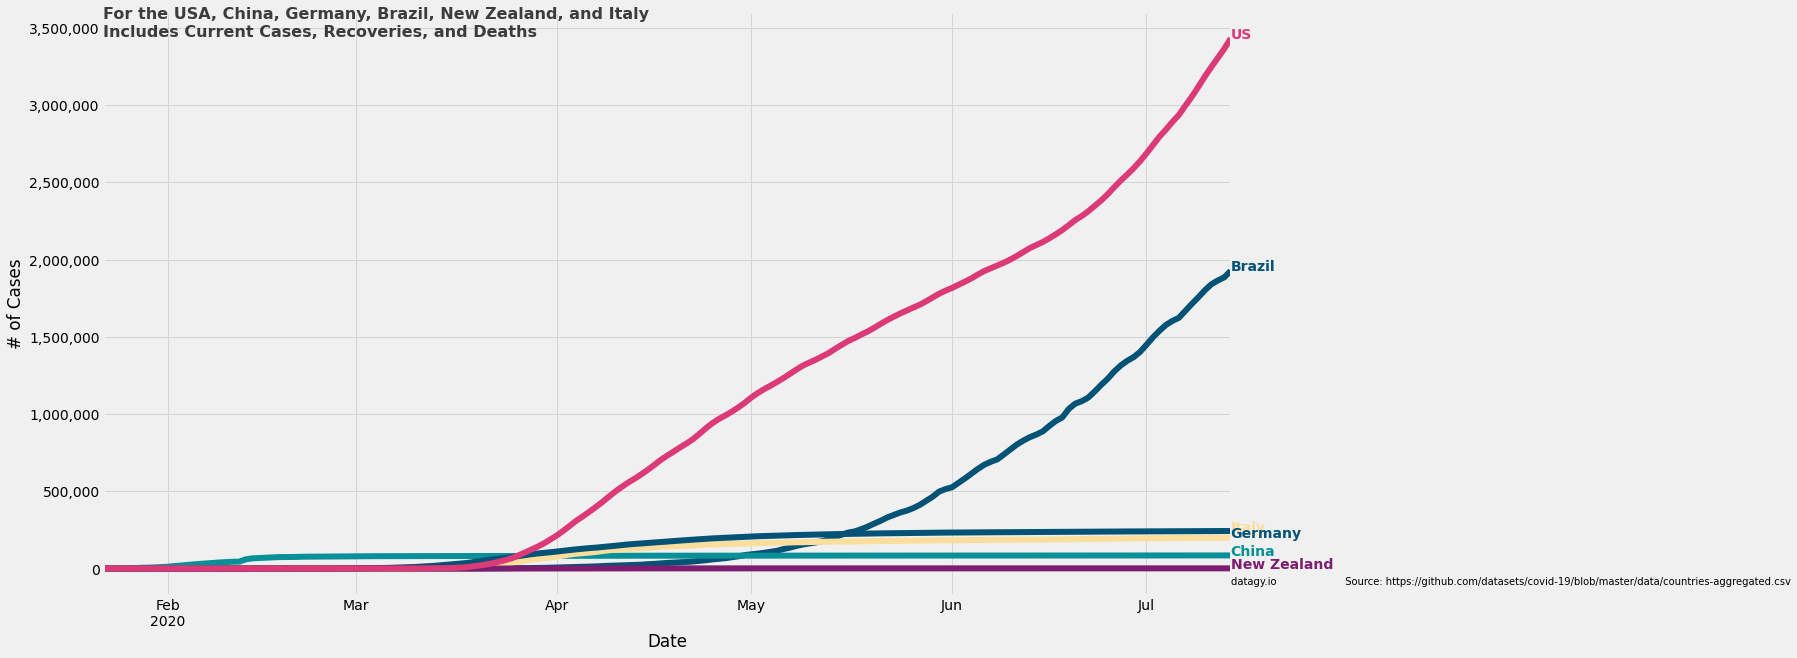

In [12]:
plot = covid.plot(figsize=(18,10), color=list(colors.values()), linewidth=6, legend=False)
 
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases') 
 
  
for country in list(colors.keys()):  
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold') 
plot.text(x = covid.index[0], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 10, weight = 'bold', alpha = 0)
plot.text(x = covid.index[0], y = int(covid.max().max())+15000,  s = "For the USA, China, Germany, Brazil, New Zealand, and Italy\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, weight = 'bold', alpha = .75)
plot.text(x = percapita.index[-1], y = -100000, s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)



# Section 8 - Assigning Colour

# Section 9 - Adding Labels 

Text(2020-01-23 00:00:00, -55, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

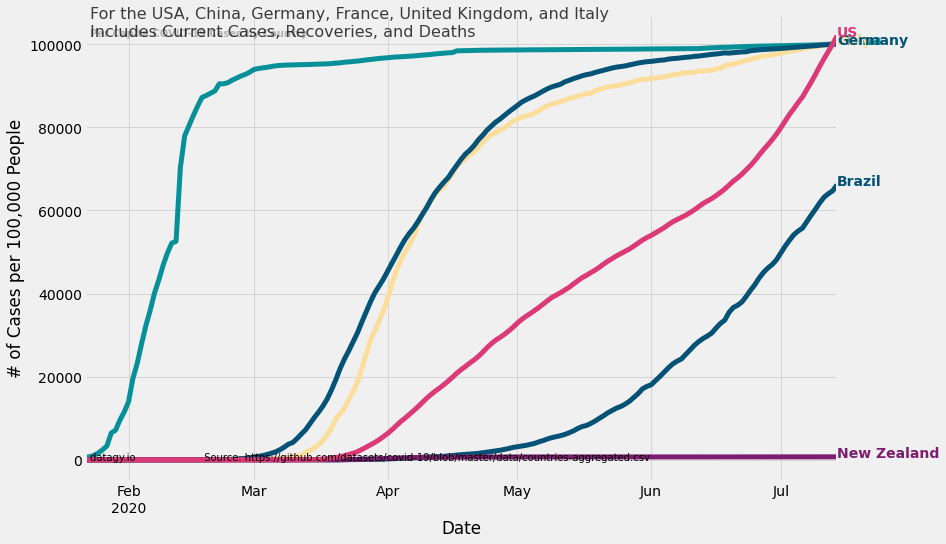

In [14]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 10, weight = 'bold', alpha = .25)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Italy\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

#Forecasting the US Coronavirus 